# Challenge de detección de latidos

Se deberán clasificar unos latidos de test en las siguientes categorías:

N		Normal beat (displayed as "·" by the PhysioBank ATM, LightWAVE, pschart, and psfd)  
R		Right bundle branch block beat  
A		Atrial premature beat  
V		Premature ventricular contraction  

Para lo cual se cuenta con los siguientes datos de entrenamiento:

signals_train.pkl: una lista que en cada elemento contiene 12 derivaciones de un mismo latido. Es decir, para un latido en particular, se tienen 12 mediciones en puntos distintos del cuerpo.

annotations_train.pkl: una lista que contiene,para cada elemento de la lista anterior, la clasificación en {N, R, A, V} de el latido correspondiente.

patients_train.pkl: una lista que contiene, para cada elemento de la lista de señales, un string que identifica al paciente al que se le midió ese latido.

Para testing se brinda la siguiente información:

signals_test.pkl: idem signals_train.pkl

patients_test.pkl: idem patients_train.pkl

Aclaración:
Debido a problemas en el dataset original, fueron removidos los pacientes 4, 17, 35, 44, 57, 72 y 74, ya que sus anotaciones contenían errores. No se preocupen cuando no los vean.

Se deberá subir un archivo .csv que contenga dos columnas:

id, type

La columna id deberá contener el número de ítem de signals_test.pkl que se clasificó
La columna type deberá tener la clasificación que se le dió al latido nro id de la lista en signals_test.pkl

Se adjunta como ejemplo un archivo sample.csv con el formato que se deberá subir para ser evaluado.
Se evaluará el accuracy de clasificación de los latidos entregados en el subset de test. Dichos latidos son 20186.

In [66]:
# Cargo los datos de train

import pickle
with open("./input/signals_train.pkl", 'rb') as f:
        lat= pickle.load(f)
with open("./input/annotations_train.pkl", 'rb') as f:
        ann= pickle.load(f)
with open("./input/patients_train.pkl", 'rb') as f:
        pat= pickle.load(f)

In [96]:
#lat1 = np.array(lat)
#lat2=lat1
lat3=lat2[1]
lat3 = np.transpose(lat3)
lat3.shape

(12, 240)

In [86]:
print(lat1.shape)
lat1=np.reshape(lat1,(-1,12))
print(lat1.shape)

(135977, 240, 12)
(32634480, 12)


In [115]:
#Calculo la matriz de covarianza y luego calculo los autovectores y autovalores
C=np.cov(lat3)
(auval,auvec)=np.linalg.eigh(C)

In [116]:
#Ordeno los autovalores de mayor a menor, y los autovectores en consecuencia, para que el orden coincida con
#el orden de la implementación de PCA de numpy
idx = auval.argsort()[::-1]   
auval = auval[idx]
auvec = auvec[:,idx]
print(lat3[0].shape)


(240,)


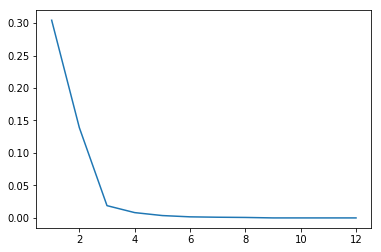

In [117]:
#Grafico de baston roto para sacar la cantidad de dim
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3,4,5,6,7,8,9,10,11,12]
y = auval
plt.plot(x, y)

In [118]:
#Transpongo los autovectores para poder usar np.dot
auvec=np.matrix.transpose(auvec)


In [142]:
print(sum(auval))
print(sum(auval[:2]))
print(sum(auval[:2])/sum(auval))
#como las primeras 2 componentes de los autovalores capturan el 92% de la varianza total, me quedo con ellos


0.47743176465017517
0.4433019983995077
0.9285138342739404


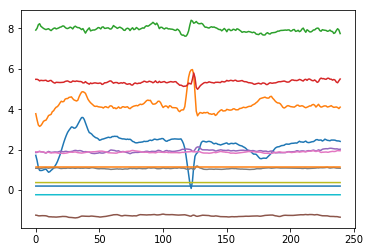

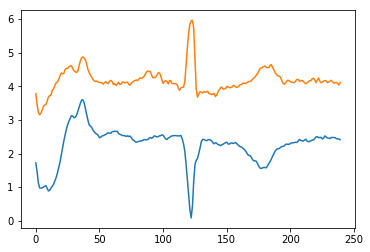

In [143]:
cantDim=2 #sale del grafico de baston roto de arriba y el calculo matematico


u=np.dot(auvec,lat3)#transformo los latidos normalizados al espacio PCA
plot.plot(np.matrix.transpose(u),label='Componentes totales')

u = np.delete(u, (2,3,4,5,6,7,8,9,10,11), axis=0)

plot.show()
plot.plot(np.matrix.transpose(u),label='Componentes reducidas')

plot.show()

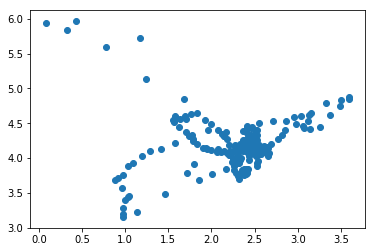

In [148]:
#grafico las 2 componentes
plt.scatter(u[0],u[1])

In [152]:
"""
Aplique PCA a una matriz de 12x240
Puedo armar un loop para aplicar PCA a los 135k latidos? o armo una sola matriz que tenga 12x(240x135000) y aplico 1 PCA?

Como resultado del PCA me quedaría:
IdPaciente | MAtriz reducida | clase. 

Esto seria la entrada de la NN?
"""

'\nPuedo armar un loop para aplicar PCA?\n'

Latido nro: 671
El latido es del tipo: N
El latido pertence al paciente I65


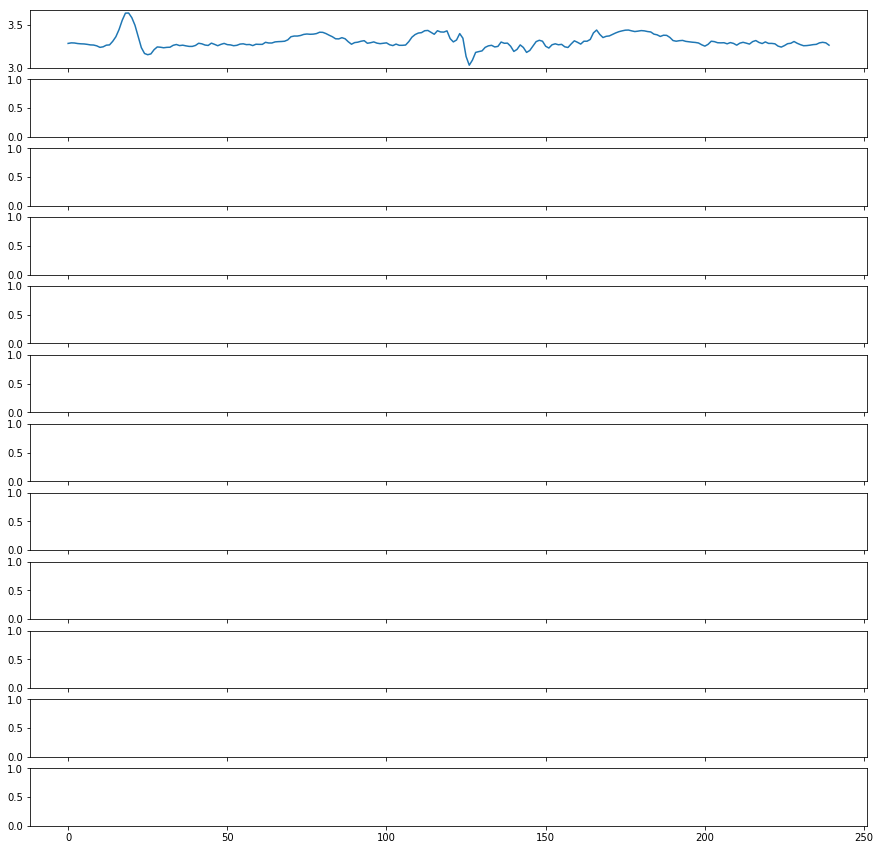

In [58]:
# Grafico el latido nro lat_idx
import numpy as np
from random import randint
import matplotlib.pyplot as plot
lat_idx=randint(0,len(lat))
f, axarr = plot.subplots(12, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)
print("Latido nro: {}".format(lat_idx))
print("El latido es del tipo: {}".format(ann[lat_idx]))
print("El latido pertence al paciente {}".format(pat[lat_idx]))
for i in range(1):
    axarr[i].plot(lat[lat_idx].T[i])
plot.show()


In [63]:
print(lat[671][:1])#.T[i]

[[ 3.28410915 -2.24558587 -2.3611557  -0.77367576  2.38041734 -2.49919743
   1.73354735  0.9823435   1.25682183 -3.92616372 -1.72873194 -1.00481541]]


In [67]:
# Cargo los datos de test

import pickle
with open("./input/signals_test.pkl", 'rb') as f:
        lat_test=pickle.load(f)
with open("./input/patients_test.pkl", 'rb') as f:
        pat_test=pickle.load(f)

Latido nro: 2151
El latido pertence al paciente I65


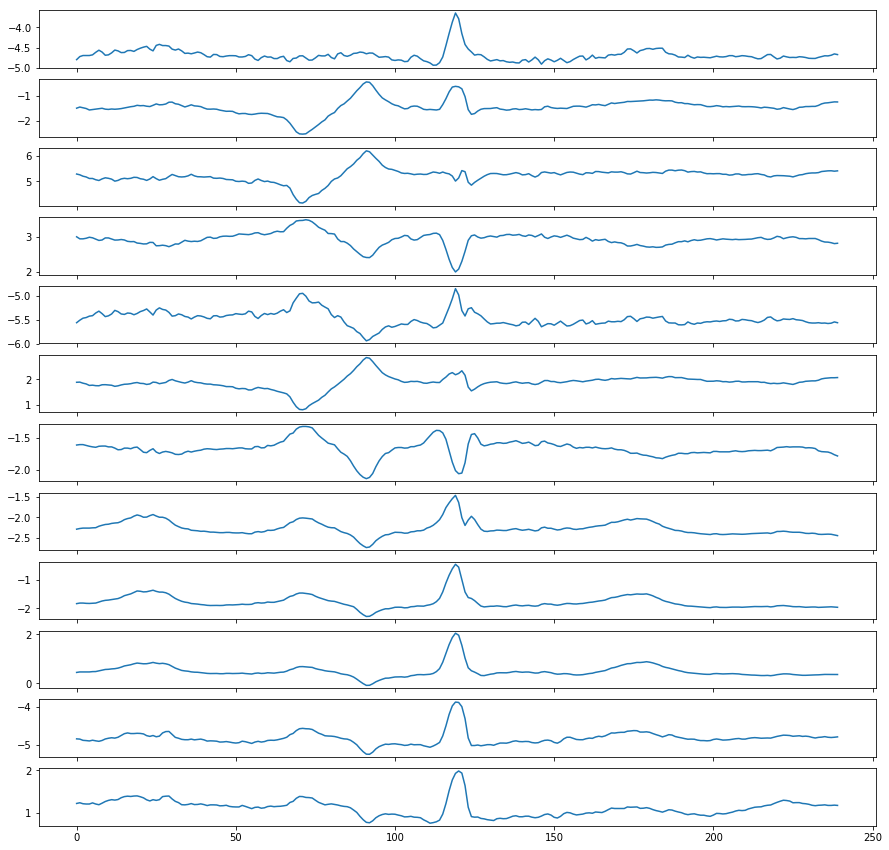

In [68]:
# Grafico el latido nro lat_idx
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plot
lat_idx=randint(0,len(lat_test))
f, axarr = plot.subplots(12, sharex=True)
f.set_figheight(15)
f.set_figwidth(15)
print("Latido nro: {}".format(lat_idx))
print("El latido pertence al paciente {}".format(pat_test[lat_idx]))
for i in range(12):
    axarr[i].plot(lat[lat_idx].T[i])
plot.show()